### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
data=pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),Unnamed: 5
0,Month-1,Region - A,Manager - A,132921.0,270390.0,NaN
1,Month-2,Region - A,Manager - C,149559.0,223334.0,NaN
2,Month-3,Region - B,Manager - A,146278.0,244243.0,NaN
3,Month-4,Region - B,Manager - B,152167.0,231808.0,NaN
4,Month-5,Region - C,Manager - B,159525.0,258402.0,NaN


### Checking for Null and deleting null rows and columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           22 non-null     object 
 1   Region                          22 non-null     object 
 2   Manager                         22 non-null     object 
 3   Sales_before_digital_add(in $)  22 non-null     float64
 4   Sales_After_digital_add(in $)   22 non-null     float64
 5   Unnamed: 5                      0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 1.3+ KB


In [4]:
data=data.dropna(how="all",axis=1)
data=data.dropna(how="all",axis=0)
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921.0,270390.0
1,Month-2,Region - A,Manager - C,149559.0,223334.0
2,Month-3,Region - B,Manager - A,146278.0,244243.0
3,Month-4,Region - B,Manager - B,152167.0,231808.0
4,Month-5,Region - C,Manager - B,159525.0,258402.0
5,Month-6,Region - A,Manager - B,137163.0,256948.0
6,Month-7,Region - C,Manager - C,130625.0,222106.0
7,Month-8,Region - A,Manager - A,131140.0,230637.0
8,Month-9,Region - B,Manager - C,171259.0,226261.0
9,Month-10,Region - C,Manager - B,141956.0,193735.0


Analyzing the mean of sales before and after digital add

In [5]:
dt=data.mean(numeric_only=True)
dt

Sales_before_digital_add(in $)    149239.954545
Sales_After_digital_add(in $)     231123.727273
dtype: float64

Text(0, 0.5, 'Mean Sales')

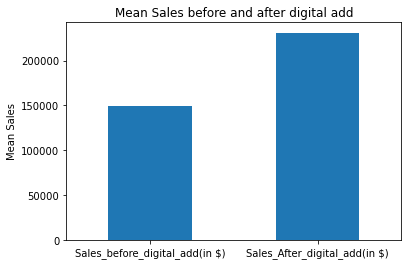

In [6]:
dt.plot(kind='bar')
plt.title('Mean Sales before and after digital add')
plt.xticks(rotation=0)
plt.ylabel('Mean Sales')
 

A company started to invest in digital marketing as a new way of their product promotions. For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.

● The company needs to check whether there is any dependency between the features “Region” and “Manager”.

Help the company to carry out their study with the help of data provided.

### 1. Is there any increase in sales after stepping into digital marketing.

Here the sample size is less than 30 and population standard deviation is unknown, so we go for the T Test with level of significance 5% (alpha=0.05)

In [7]:
#H0: There is no significant change in sales after stepping into digital marketing.
#H1: There is increase in sales after stepping into digital marketing.

In [8]:
before=data['Sales_before_digital_add(in $)']
after=data['Sales_After_digital_add(in $)']

In [9]:
alpha=0.05

In [10]:
#library for t test
from scipy.stats import ttest_ind

In [11]:
_,P = ttest_ind(before,after)
print("P Value : ",P)

P Value :  2.614368006904645e-16


In [12]:
if P>alpha:
    print("Failing to Reject H0")
else:
    print("reject H0")

reject H0


Here P value < alpha. Therefore, we reject the Null Hypothesis.

we conclude that There is increase in sales after stepping into digital Marketing

### 2.  check whether there is any dependency between the features “Region” and “Manager”

The Chi-square test analyzes categorical data. It tests if the variables are independent

In [13]:
#H0: Region and Manager are Independent features
#H1: Region and manager are Dependent

In [14]:
region=data['Region']
manager=data['Manager']

In [15]:
CT=pd.crosstab(region,manager)
CT

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


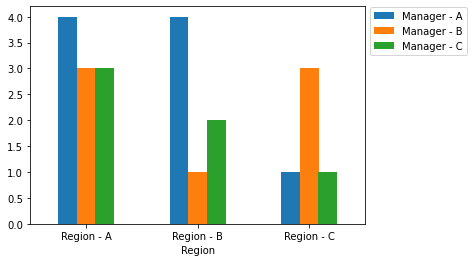

In [16]:
barplot = CT.plot.bar(rot=0)
barplot.legend(bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [17]:
#library for chi square test
from scipy.stats import chi2_contingency

In [18]:
chi_value,P_value,df,exp=chi2_contingency(CT)
chi_value,P_value,df,exp

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [19]:
if P_value>alpha:
    print("Failing to Reject H0")
else:
    print("reject H0")

Failing to Reject H0


Here the P Value is greater that the alpha 0.05 Therfore, we fail to reject the null hypothesis. 
we accept the null hypothesis

Region and Manager are Independent features